
# Curve Fitting - Week 1 Task

In [1]:
#the following was taken from [1]:

import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

## Part 1 - Defining Polynomial Functions
Create a function with the following definition 

                                          `def polyModelWithNoise(x,theta,sigma)`
where "x" is a numpy array of x values, "theta" are the parameters of the polynomial such that $y(x) = \sum_i \theta_i x^i..(1)$  and sigma is the standard deviation of the noise distribution that is added to the polynomial function. 

[2]


In [2]:
def polyModelWithNoise(x,theta,sigma):
    ''' Polynomial function with noise
    
    Inputs:
    x: x poits/values
    theta: parameters of the polynomial
    sigma: standard deviation of the noise (which is a normal distribution)
    
    Outputs:
    polyModelWithNoise(x,theta,sigma): the polynomial function + noise

    '''
    
    #code the polynomial summation with a for loop:
    y = 0 #set inital y value
    for i in range(len(theta)):
        y = y + theta[i]*(x**i) #the summation shown in (1)

    noise = np.random.normal(0,sigma,len(x)) 
    return noise + y #the polynomial function + noise

Use your function to plot a sample of 100 points linearly arranged between 0 and 1, with theta parameters of [0,1] and a noise sigma of 0.5 [2]

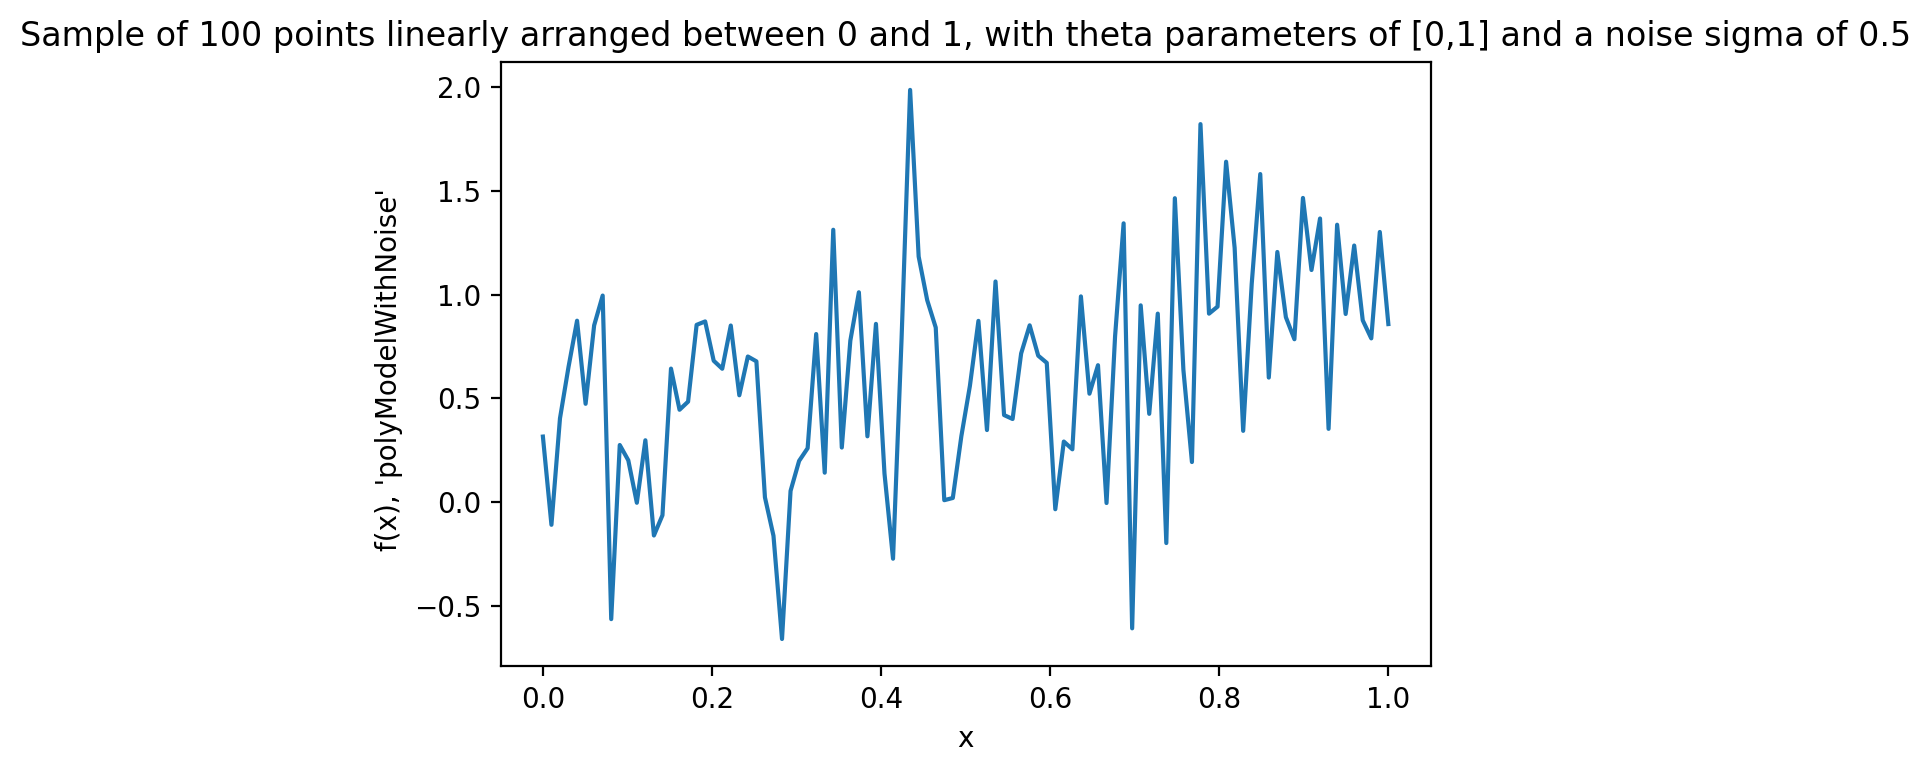

In [3]:
x=np.linspace(0,1,100) #use linspace() to generate linearly arrainges x points

plt.figure()
plt.plot(x,polyModelWithNoise(x,[0,1],0.5))
plt.xlabel("x")
plt.ylabel("f(x), 'polyModelWithNoise' ")
plt.title("Sample of 100 points linearly arranged between 0 and 1, with theta parameters of [0,1] and a noise sigma of 0.5")
plt.show()

Define another function with the definition `def polyGradient(x,theta):` which will return the gradient of the polynomial function with respect to the parameters theta. [2]

The gradient of a polynomial with repect to theta is:

$$ \frac{dy}{d\theta_i} = x^i ...  (2)$$

In [4]:
def polyGradient(x,theta):
    ''' gradient of polynomial wrt theta
    
    Inputs:
    x: x poits/values
    theta: parameters of the polynomial
    
    Outputs:
    polyGradient(x,theta): gradients

    '''
    #use a for loop to generate the gradients (equation [2]):
    grad_array = np.array([pow(x,i) for i in range(len(theta))])  
    
    return grad_array

#print(polyGradient(x,[0,1])) 

## Part 2 - Stochastic Gradient Decent Algorithm

Implement a stochastic gradient descent algorithm to do the following:
1. Start with theta values of $\theta = [-1,0.5]$, and a learning rate of 0.5 then in a loop do the following 100 times:
2. Generate a sample of 10 random x values between 0 and 1
3. Generate 10 y data values using your polyModelWithNoise function with the truth parameters $\theta=[0,1]$,$\sigma=0.5$
4. Generate 10 y model values using the current theta values which started at $\theta = [-1,0.5]$, but no noise
5. Update the theta values using the gradient descent algorithm 

[2]


In [5]:
numSteps = 100
learning_rate = 0.5
theta = [-1,0.5] #starting theta values

#iteration of Stochastic Gradient Decent Algorithm with iterations of 'numSteps':
for i in range(numSteps):
    x=np.random.uniform(0,1,10) #10 random x values between 0,1
    
    #polynomial with the true theta values (the values we are trying to get to) + noise [data]:
    y_data = polyModelWithNoise(x,[0,1],0.5) 
    #polynomial with the starting theta values + no noise [model]:
    y_model = polyModelWithNoise(x,theta,0)
    
    #difference/deviation between data and model values 
    deviation = y_model - y_data
    
    #update theta values using gradient decent algorithm:
    theta-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta), axis=1)
    
    print(theta, "Theta values for iteration number", i+1 )


[-0.28526664  0.90798523] Theta values for iteration number 1
[-0.21258208  0.94361629] Theta values for iteration number 2
[-0.12337951  0.98920785] Theta values for iteration number 3
[-0.02187145  1.06163815] Theta values for iteration number 4
[0.02480121 1.07141598] Theta values for iteration number 5
[-0.07324957  0.99951225] Theta values for iteration number 6
[-0.01347521  1.05504053] Theta values for iteration number 7
[0.02853423 1.08229174] Theta values for iteration number 8
[0.16247951 1.18386211] Theta values for iteration number 9
[0.13579551 1.16179017] Theta values for iteration number 10
[0.01883024 1.05313866] Theta values for iteration number 11
[-0.04395095  0.99850567] Theta values for iteration number 12
[-0.15667358  0.94583904] Theta values for iteration number 13
[-0.03697224  0.98230088] Theta values for iteration number 14
[0.03116349 1.01668642] Theta values for iteration number 15
[-0.04055503  0.99484817] Theta values for iteration number 16
[-0.00925146 

#### Comments on result:

The results are relativley close to our true theta values ([0,1]), however, increasing the 'numSteps' would provide a more accurate result since more iterations are performed.

## Part 3 - Different Order Polynomials:

Now let's switch to testing using a third order polynomial with parameters $\theta =[0,1,2,2]$ using the same noise as before

Fit this third order polynomial data using a 1st order polynomial, 3rd order polynomial and 7th order polynomial using a stochastic gradient algorithm that samples 10 x and y data values between 0 and 1.

[2]


### 3rd order:

In [6]:
numSteps = 100
learning_rate = 0.5
theta3 = [-1,0.5, 1, -0.5] #arbitrary third order starting theta values
#(alternativley, a random generation of starting theta values could have been implemented)

for i in range(numSteps):
    x=np.random.uniform(0,1,10)
    
    y_data = polyModelWithNoise(x,[0,1,2,2],0.5) #data y with the third order true theta values
    y_model = polyModelWithNoise(x,theta3, 0)#model y with the third order starting theta values
    
    deviation = y_model - y_data
    
    theta3-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta3))
    print(theta3, "Theta values for iteration number", i+1 )

[-0.62488449  0.87511551  1.37511551 -0.12488449] Theta values for iteration number 1
[-0.20476654  1.29523346  1.79523346  0.29523346] Theta values for iteration number 2
[-0.13199854  1.36800146  1.86800146  0.36800146] Theta values for iteration number 3
[-0.05893841  1.44106159  1.94106159  0.44106159] Theta values for iteration number 4
[0.00496089 1.50496089 2.00496089 0.50496089] Theta values for iteration number 5
[0.01529248 1.51529248 2.01529248 0.51529248] Theta values for iteration number 6
[0.11082425 1.61082425 2.11082425 0.61082425] Theta values for iteration number 7
[0.03399609 1.53399609 2.03399609 0.53399609] Theta values for iteration number 8
[0.03562526 1.53562526 2.03562526 0.53562526] Theta values for iteration number 9
[0.1064216 1.6064216 2.1064216 0.6064216] Theta values for iteration number 10
[0.0858334 1.5858334 2.0858334 0.5858334] Theta values for iteration number 11
[0.10901838 1.60901838 2.10901838 0.60901838] Theta values for iteration number 12
[0.08

### 1st Order:

In [7]:
numSteps = 100
learning_rate = 0.5
theta1 = [-1,0.5] # arbitrary first order starting theta values

for i in range(numSteps):
    x=np.random.uniform(0,1,10)
    
    y_data = polyModelWithNoise(x,[0,1,2,2],0.5) #data y with the third order true theta values
    y_model = polyModelWithNoise(x,theta1, 0) #model y with the first order starting theta values
    
    deviation = y_model - y_data
    
    theta1-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta1))
    print(theta1 , "Theta values for iteration number", i+1 )

[-0.35476516  1.14523484] Theta values for iteration number 1
[0.06921855 1.56921855] Theta values for iteration number 2
[0.47230306 1.97230306] Theta values for iteration number 3
[0.57617368 2.07617368] Theta values for iteration number 4
[0.70818946 2.20818946] Theta values for iteration number 5
[0.78759977 2.28759977] Theta values for iteration number 6
[0.74603696 2.24603696] Theta values for iteration number 7
[0.84495863 2.34495863] Theta values for iteration number 8
[0.69356592 2.19356592] Theta values for iteration number 9
[0.67374716 2.17374716] Theta values for iteration number 10
[0.60068737 2.10068737] Theta values for iteration number 11
[0.61140441 2.11140441] Theta values for iteration number 12
[0.73458979 2.23458979] Theta values for iteration number 13
[0.58528385 2.08528385] Theta values for iteration number 14
[0.84752873 2.34752873] Theta values for iteration number 15
[0.77078603 2.27078603] Theta values for iteration number 16
[0.66809793 2.16809793] Theta v

### 7th Order:

In [8]:
numSteps = 100
learning_rate = 0.5
theta7 = [-1, 0.5, 1, -0.5, 2, -3 ,3 ,0] # arbitrary seventh order starting theta values

for i in range(numSteps):
    x=np.random.uniform(0,1,10)
    
    y_data = polyModelWithNoise(x,[0,1,2,2],0.5) #data y with the third order true theta values
    y_model = polyModelWithNoise(x,theta7, 0) #model y with the seventh order starting theta values
    
    deviation = y_model - y_data
    
    theta7-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta7))
    
    print(theta7, "Theta values for iteration number", i+1 )

[-0.58635137  0.91364863  1.41364863 -0.08635137  2.41364863 -2.58635137
  3.41364863  0.41364863] Theta values for iteration number 1
[-0.47398437  1.02601563  1.52601563  0.02601563  2.52601563 -2.47398437
  3.52601563  0.52601563] Theta values for iteration number 2
[-0.48857483  1.01142517  1.51142517  0.01142517  2.51142517 -2.48857483
  3.51142517  0.51142517] Theta values for iteration number 3
[-0.41978837  1.08021163  1.58021163  0.08021163  2.58021163 -2.41978837
  3.58021163  0.58021163] Theta values for iteration number 4
[-0.42207255  1.07792745  1.57792745  0.07792745  2.57792745 -2.42207255
  3.57792745  0.57792745] Theta values for iteration number 5
[-0.39312009  1.10687991  1.60687991  0.10687991  2.60687991 -2.39312009
  3.60687991  0.60687991] Theta values for iteration number 6
[-0.31884895  1.18115105  1.68115105  0.18115105  2.68115105 -2.31884895
  3.68115105  0.68115105] Theta values for iteration number 7
[-0.4098814  1.0901186  1.5901186  0.0901186  2.5901186

  3.63954178  0.63954178] Theta values for iteration number 202
[-0.31707759  1.18292241  1.68292241  0.18292241  2.68292241 -2.31707759
  3.68292241  0.68292241] Theta values for iteration number 203
[-0.28646849  1.21353151  1.71353151  0.21353151  2.71353151 -2.28646849
  3.71353151  0.71353151] Theta values for iteration number 204
[-0.3012671  1.1987329  1.6987329  0.1987329  2.6987329 -2.3012671
  3.6987329  0.6987329] Theta values for iteration number 205
[-0.40554327  1.09445673  1.59445673  0.09445673  2.59445673 -2.40554327
  3.59445673  0.59445673] Theta values for iteration number 206
[-0.4342173  1.0657827  1.5657827  0.0657827  2.5657827 -2.4342173
  3.5657827  0.5657827] Theta values for iteration number 207
[-0.35848209  1.14151791  1.64151791  0.14151791  2.64151791 -2.35848209
  3.64151791  0.64151791] Theta values for iteration number 208
[-0.42094989  1.07905011  1.57905011  0.07905011  2.57905011 -2.42094989
  3.57905011  0.57905011] Theta values for iteration numb

  3.59490659  0.59490659] Theta values for iteration number 428
[-0.40602418  1.09397582  1.59397582  0.09397582  2.59397582 -2.40602418
  3.59397582  0.59397582] Theta values for iteration number 429
[-0.36392178  1.13607822  1.63607822  0.13607822  2.63607822 -2.36392178
  3.63607822  0.63607822] Theta values for iteration number 430
[-0.46982301  1.03017699  1.53017699  0.03017699  2.53017699 -2.46982301
  3.53017699  0.53017699] Theta values for iteration number 431
[-0.40964199  1.09035801  1.59035801  0.09035801  2.59035801 -2.40964199
  3.59035801  0.59035801] Theta values for iteration number 432
[-0.30364417  1.19635583  1.69635583  0.19635583  2.69635583 -2.30364417
  3.69635583  0.69635583] Theta values for iteration number 433
[-0.29936827  1.20063173  1.70063173  0.20063173  2.70063173 -2.29936827
  3.70063173  0.70063173] Theta values for iteration number 434
[-0.38018312  1.11981688  1.61981688  0.11981688  2.61981688 -2.38018312
  3.61981688  0.61981688] Theta values fo

  3.63091379  0.63091379] Theta values for iteration number 615
[-0.46336022  1.03663978  1.53663978  0.03663978  2.53663978 -2.46336022
  3.53663978  0.53663978] Theta values for iteration number 616
[-0.40319013  1.09680987  1.59680987  0.09680987  2.59680987 -2.40319013
  3.59680987  0.59680987] Theta values for iteration number 617
[-0.39425297  1.10574703  1.60574703  0.10574703  2.60574703 -2.39425297
  3.60574703  0.60574703] Theta values for iteration number 618
[-0.47338406  1.02661594  1.52661594  0.02661594  2.52661594 -2.47338406
  3.52661594  0.52661594] Theta values for iteration number 619
[-0.44710046  1.05289954  1.55289954  0.05289954  2.55289954 -2.44710046
  3.55289954  0.55289954] Theta values for iteration number 620
[-0.43603506  1.06396494  1.56396494  0.06396494  2.56396494 -2.43603506
  3.56396494  0.56396494] Theta values for iteration number 621
[-0.4183648  1.0816352  1.5816352  0.0816352  2.5816352 -2.4183648
  3.5816352  0.5816352] Theta values for iterat

[-0.4382834  1.0617166  1.5617166  0.0617166  2.5617166 -2.4382834
  3.5617166  0.5617166] Theta values for iteration number 831
[-0.40351275  1.09648725  1.59648725  0.09648725  2.59648725 -2.40351275
  3.59648725  0.59648725] Theta values for iteration number 832
[-0.37617038  1.12382962  1.62382962  0.12382962  2.62382962 -2.37617038
  3.62382962  0.62382962] Theta values for iteration number 833
[-0.39912221  1.10087779  1.60087779  0.10087779  2.60087779 -2.39912221
  3.60087779  0.60087779] Theta values for iteration number 834
[-5.00163512e-01  9.99836488e-01  1.49983649e+00 -1.63512486e-04
  2.49983649e+00 -2.50016351e+00  3.49983649e+00  4.99836488e-01] Theta values for iteration number 835
[-0.45030392  1.04969608  1.54969608  0.04969608  2.54969608 -2.45030392
  3.54969608  0.54969608] Theta values for iteration number 836
[-0.41972704  1.08027296  1.58027296  0.08027296  2.58027296 -2.41972704
  3.58027296  0.58027296] Theta values for iteration number 837
[-0.37859321  1.1

## Part 4 - Plot and Comparison

Plot the third order polynomial data over an expanded x-range of -0.5,1.5 (with linearly spaced x values).


Compare the data to your three best fit models (which were trained over the range x=0,1) comment on how well the models generalise to the regions of x over which they were not trained. 


[2]

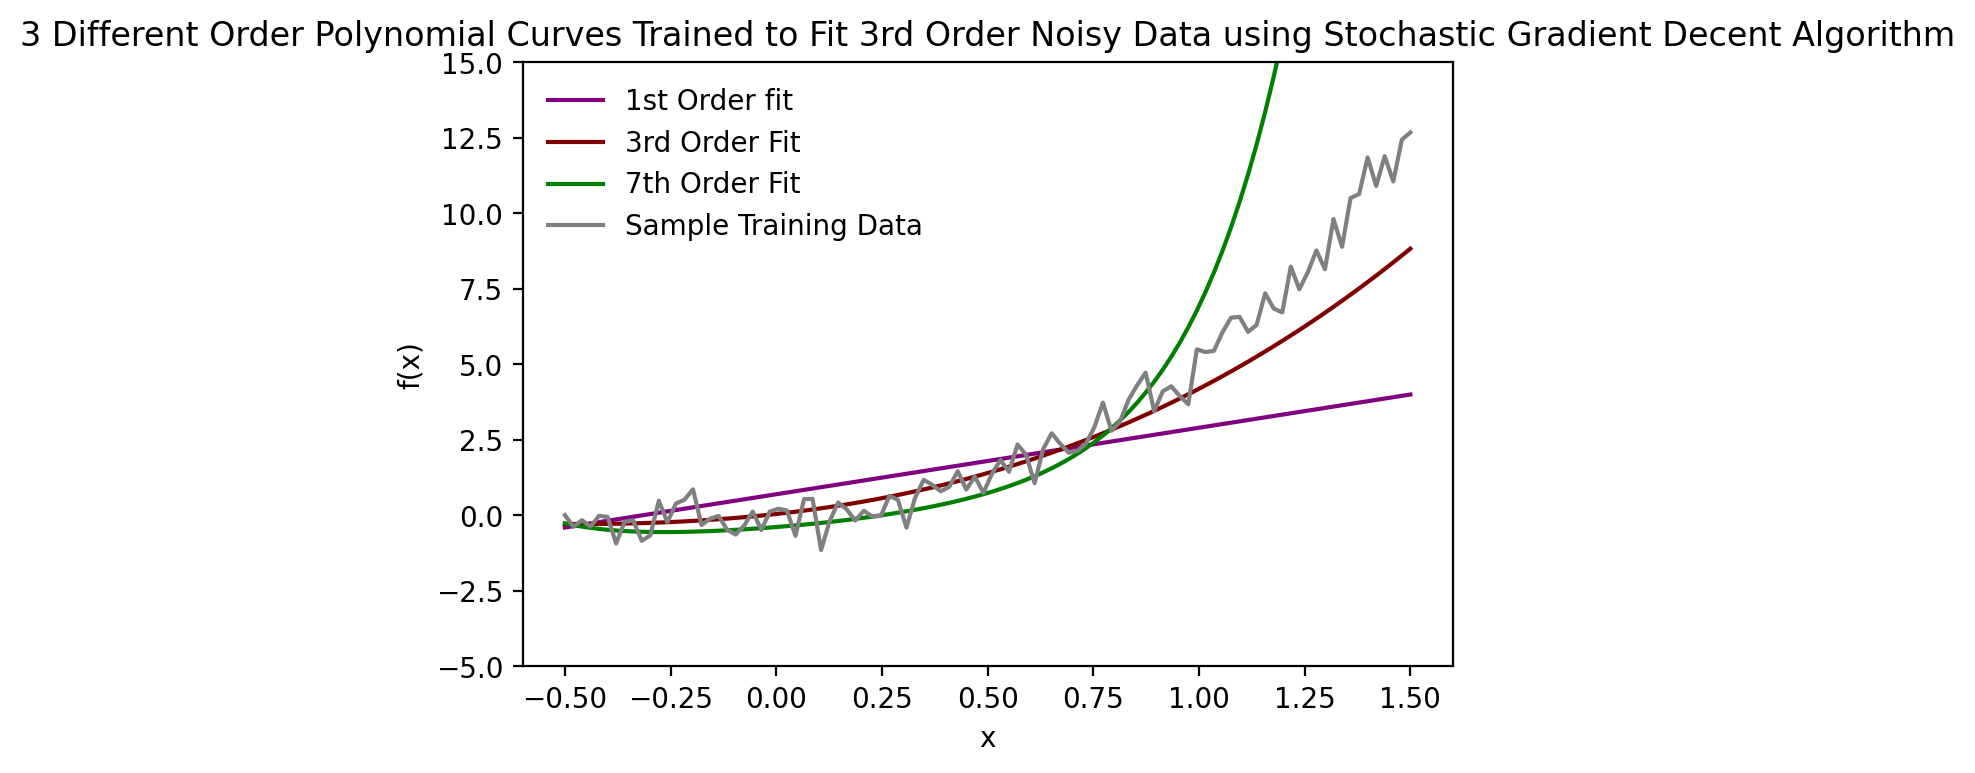

In [10]:
x_range = np.linspace(-0.5,1.5,100) #expanded x-range of -0.5,1.5

plt.figure()
plt.plot(x_range, polyModelWithNoise(x_range,theta1,0), color = 'purple', label="1st Order fit") #1st order
plt.plot(x_range, polyModelWithNoise(x_range,theta3,0), color = 'maroon', label="3rd Order Fit") #3rd order
plt.plot(x_range, polyModelWithNoise(x_range,theta7,0), color = 'green', label="7th Order Fit") #7th order
plt.xlabel("x")
plt.ylabel("f(x)")    
plt.plot(x_range, polyModelWithNoise(x_range,[0,1,2,2],0.5), color = 'grey', label="Sample Training Data") #sample training data
plt.ylim(-5, 15)
plt.title("3 Different Order Polynomial Curves Trained to Fit 3rd Order Noisy Data using Stochastic Gradient Decent Algorithm")
plt.legend()
plt.show()

### Comparison

The models are best fitted in the region between 0 and 1 x values. However, below 0, the models maintain a good fit. However, beyond 1 (and even a bit before), the models are a very poor fit. The third order is an exception because it is the same order as the true training data. Therefore, the best fit is, of course, the third order fit. 

## References

[1]Nichol. R 2021. " Week1_CurveFitting.ipynb". [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/course/view.php?id=6793 [accessed 10th October 2021] 

[2] Nichol. R 2021. " Module 1 Exercises". [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/mod/assign/view.php?id=395890 [accessed 10th October 2021]